✔ Dataset Loaded Successfully!

   transaction_id   amount  duration protocol        src_ip     dst_ip  \
0               1  1878.96      7.61     ICMP  192.168.1.42  10.0.0.42   
1               2  4754.06      0.34     ICMP  192.168.1.39  10.0.0.21   
2               3  3662.65      0.32     ICMP  192.168.1.16  10.0.0.37   
3               4  2997.31      3.30     ICMP  192.168.1.33  10.0.0.27   
4               5   788.53      4.94      UDP  192.168.1.49  10.0.0.29   

   packet_size  fraud  
0          613      0  
1          325      1  
2         1028      0  
3          498      0  
4         1275      1  

✔ Model Training Completed!

============= MODEL PERFORMANCE =============
Accuracy  : 0.9208333333333333
Precision : 1.0
Recall    : 0.7625
ROC-AUC   : 0.8848046875



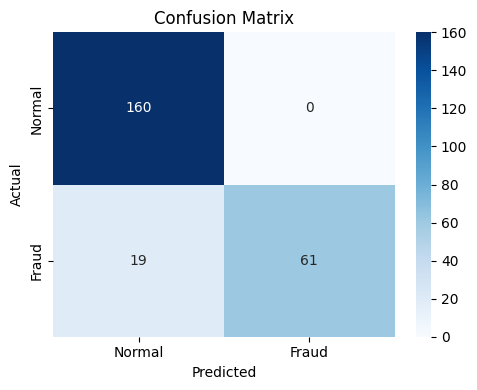

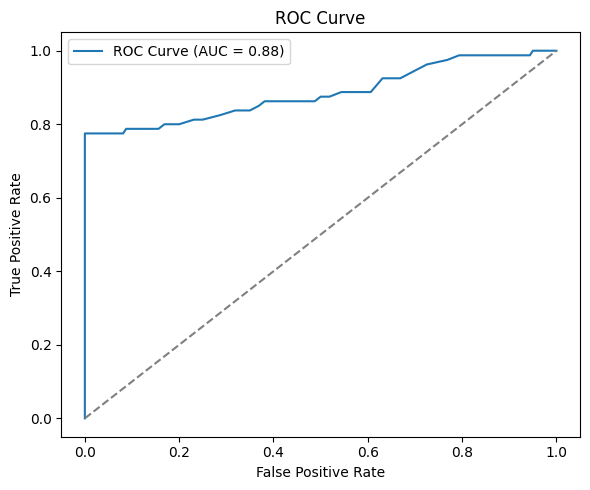

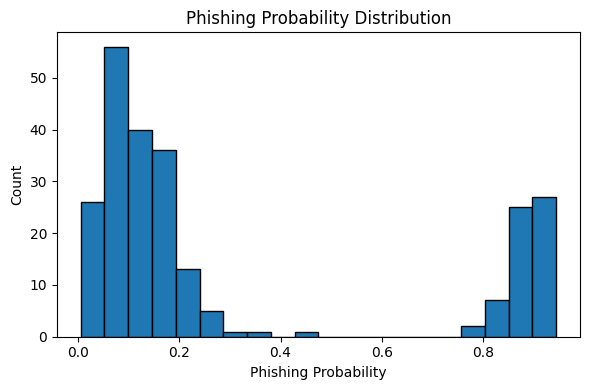


=== SAMPLE PREDICTION ===
Phishing Prediction : 0
Phishing Probability: 0.08


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
df = pd.read_csv("/content/Progect data.csv")
print("✔ Dataset Loaded Successfully!\n")
print(df.head())
X = df.drop("fraud", axis=1)
y = df["fraud"]
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("\n============= MODEL PERFORMANCE =============")
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("ROC-AUC   :", roc_auc_score(y_test, y_prob))
print("==============================================\n")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Fraud"],
            yticklabels=["Normal", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
plt.hist(y_prob, bins=20, edgecolor="black")
plt.title("Phishing Probability Distribution")
plt.xlabel("Phishing Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
sample = pd.DataFrame([{
    "transaction_id": 9999,
    "amount": 2500,
    "duration": 2.5,
    "protocol": "TCP",
    "src_ip": "192.168.1.100",
    "dst_ip": "10.0.0.50",
    "packet_size": 800
}])
pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]
print("\n=== SAMPLE PREDICTION ===")
print("Phishing Prediction :", pred)
print("Phishing Probability:", prob)